In [1]:
'''
Basic Image Processing Techniques
'''
# Importing libraries
import numpy as np
import os
from imageio import imread
import matplotlib.pyplot as plt
from skimage.transform import rotate
import skimage.io
import skimage.transform
import PIL
from PIL import Image 

%matplotlib inline

In [2]:
def print_typeshape(img):
    '''
    Prints the type and shape of image
    '''
    print(f"Type of image: {type(img)}")
    print(f"Shape of image: {img.shape}")

## Loading and Plotting image

Type of image: <class 'imageio.core.util.Array'>
Shape of image: (445, 500, 3)


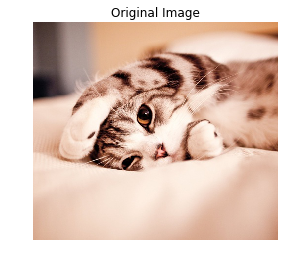

In [3]:
# Loading image
cute_cat = imread('cute_cat.jpg')
print_typeshape(cute_cat)
# Pretty plot
plt.figure('Cute Cat')
plt.imshow(cute_cat)
plt.title("Original Image")
_ = plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Type of image: <class 'imageio.core.util.Array'>
Shape of image: (445, 500, 3)


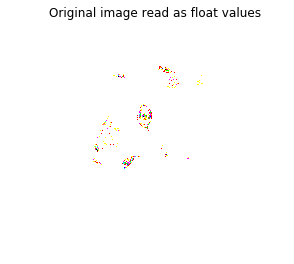

In [4]:
# Reading the image as float value
cute_cat_float = imread('cute_cat.jpg').astype(np.float)
print_typeshape(cute_cat_float)
# Pretty plot
plt.figure('Cute cat - float')
plt.imshow(cute_cat_float)
plt.title('Original image read as float values')
_ = plt.axis('off')

That's weird why not normalize it and try again

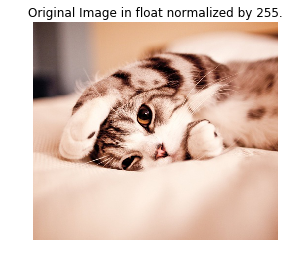

In [5]:
plt.figure('Cute cat corrected')
plt.imshow(cute_cat_float/255.)
plt.title('Original Image in float normalized by 255.')
_ = plt.axis('off')

## Resize

Type of image: <class 'numpy.ndarray'>
Shape of image: (100, 100, 3)


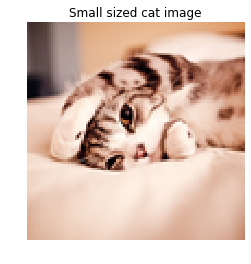

In [6]:
# Resize
im = Image.open('cute_cat.jpg')
cat_small = np.array(im.resize([100, 100], resample =  1))
print_typeshape(cat_small)
# Pretty plot
plt.figure('Resized image')
plt.imshow(cat_small)
plt.title('Small sized cat image')
_ = plt.axis('off')

## Grayscale

Type of image: <class 'numpy.ndarray'>
Shape of image: (100, 100)


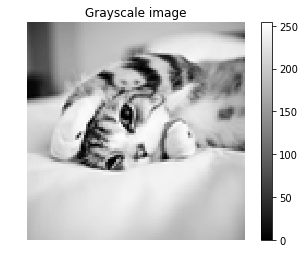

In [7]:
# Grayscale
def rgb2gray(img):
    if len(img.shape) is 3:
        return np.dot(img[...,:3], [0.299, 0.587, 0.114])
    else:
        print("Current image is gray!")
    return img

cat_small_gray = rgb2gray(cat_small)
print_typeshape(cat_small_gray)
# Pretty plot
plt.figure('Small cat image')
plt.imshow(cat_small_gray, cmap=plt.get_cmap('gray'))
plt.title('Grayscale image')
plt.colorbar()
_ = plt.axis('off')

## Reshape

In [8]:
#Converting to vector
catrowvec = np.reshape(cat_small_gray, (1, -1))
print_typeshape(catrowvec)

#Converting to matrix
catmatrix = np.reshape(cat_small_gray, (100, 100))
print_typeshape(catmatrix)

Type of image: <class 'numpy.ndarray'>
Shape of image: (1, 10000)
Type of image: <class 'numpy.ndarray'>
Shape of image: (100, 100)


## Rotation

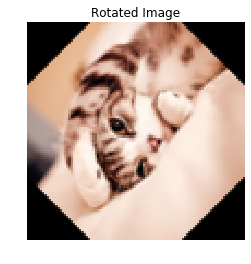

In [9]:
cat_rotated = rotate(cat_small, angle = 45)
# Pretty plot
plt.figure('Rotated image')
plt.imshow(cat_rotated)
plt.title('Rotated Image')
_ = plt.axis('off')

## Loading from folder

In [10]:
cwd = os.getcwd()
path = cwd + '/images/cats'
valid_exts = [".jpg",".gif",".png",".tga", ".jpeg"]

print("%d files in %s" % (len(os.listdir(path)), path))

# Append Images and their Names to Lists
imgs = []
names = []
for f in os.listdir(path):
    # For all files 
    ext = os.path.splitext(f)[1]
    # Check types 
    if ext.lower() not in valid_exts:
        continue
    fullpath = os.path.join(path,f)
    imgs.append(imread(fullpath))
    names.append(os.path.splitext(f)[0]+os.path.splitext(f)[1])
print ("%d images loaded" % (len(imgs)))

4 files in C:\Users\Lingesh K\Desktop\Python Files Github\Python-Basics\Basic Image Processing\notebooks/images/cats
4 images loaded


In [11]:
# Check
nimgs = len(imgs)
randidx = np.sort(np.random.randint(nimgs, size=3))
print ("Type of 'imgs': ", type(imgs))
print ("Length of 'imgs': ", len(imgs))
for curr_img, curr_name, i \
    in zip([imgs[j] for j in randidx]
           , [names[j] for j in randidx]
           , range(len(randidx))):
    print ("[%d] Type of 'curr_img': %s" % (i, type(curr_img)))
    print ("    Name is: %s" % (curr_name))
    print ("    Size of 'curr_img': %s" % (curr_img.shape,))

Type of 'imgs':  <class 'list'>
Length of 'imgs':  4
[0] Type of 'curr_img': <class 'imageio.core.util.Array'>
    Name is: cat_2.jpeg
    Size of 'curr_img': (183, 275, 3)
[1] Type of 'curr_img': <class 'imageio.core.util.Array'>
    Name is: cat_2.jpeg
    Size of 'curr_img': (183, 275, 3)
[2] Type of 'curr_img': <class 'imageio.core.util.Array'>
    Name is: cat_4.jpeg
    Size of 'curr_img': (187, 269, 3)


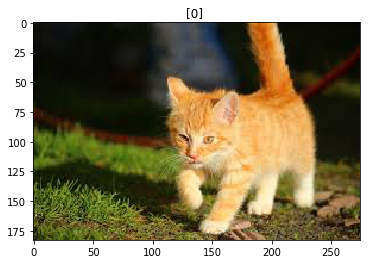

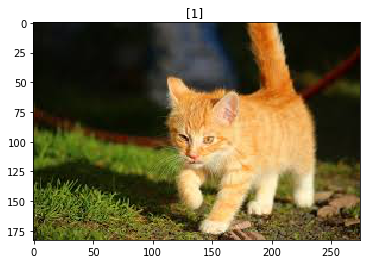

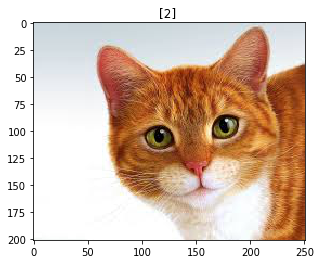

In [12]:
# Plot Images in 'imgs' list
nimgs = len(imgs)
randidx = np.sort(np.random.randint(nimgs, size=3))
for curr_img, curr_name, i \
    in zip([imgs[j] for j in randidx]
           , [names[j] for j in randidx], range(len(randidx))):
    plt.figure(i)
    plt.imshow(curr_img)
    plt.title("[" + str(i) + "] ")
    plt.draw()

---